# Computational Creativity - Assignment 2: The Great Bitwise Bake Off

###  Load the inspirational set entitled: Dessert_recipes.json

The selection of recipes aimed for diversity, with the intention of incorporating a wide range of ingredients and cooking methods. To ensure variety, multiple sources were consulted during the recipe selection process.

As the project evolved, the team decided to integrate a fitness function that considers the nutritional content of the recipes. For this purpose, a food calorie calculator from livofy.com was utilized. This addition came about during discussions on optimizing the algorithm's performance.

When considering the fitness function, the team chose to work with a dataset comprising 20 diverse recipes. These recipes were deliberately selected to encompass different units for expressing ingredient amounts, adding a layer of complexity to the optimization process.

In [ ]:
import json
import pprint
import random
import math


json_file_path = '/content/Dessert_recipes.json'

with open(json_file_path, 'r') as json_file:
    recipes = json.load(json_file)

pprint.PrettyPrinter(indent=2, depth=4).pprint(recipes['recipes'][1])

{ 'ingredients': [ { 'amount': '480',
                     'calories': '1536.960',
                     'cost': '0.89',
                     'fat': '7.2',
                     'ingredient': 'flour',
                     'protein': '50.88',
                     'unit': 'g'},
                   { 'amount': '180',
                     'calories': '756',
                     'cost': '2.99',
                     'fat': '18',
                     'ingredient': 'cocoa powder',
                     'protein': '36',
                     'unit': 'g'},
                   { 'amount': '1',
                     'calories': '0',
                     'cost': '0',
                     'fat': '0',
                     'ingredient': 'baking soda',
                     'protein': '0',
                     'unit': 'tsp'},
                   { 'amount': '1',
                     'calories': '0',
                     'cost': '0',
                     'fat': '0',
                     'ingredient': 'kosher sal

### Extract all the ingredients, so we can apply the mutation

In [ ]:
all_ingredients = []
for recipe in recipes['recipes']:
  all_ingredients.extend(recipe['ingredients'])

### Creating an initial population

In [ ]:
population_size = 20

population = random.sample(recipes['recipes'], k=population_size)
pprint.PrettyPrinter(indent=2, depth=2).pprint(population)

[ {'ingredients': [...], 'name': 'Peanut Butter Cookies'},
  {'ingredients': [...], 'name': 'Brownie Cookies'},
  {'ingredients': [...], 'name': 'Chewy chocolate cookies'},
  {'ingredients': [...], 'name': 'Tiramisu'},
  {'ingredients': [...], 'name': 'Marmalade Cake'},
  {'ingredients': [...], 'name': 'Caramel cake'},
  {'ingredients': [...], 'name': 'Coffe Shortbread'},
  {'ingredients': [...], 'name': 'Banana cake '},
  {'ingredients': [...], 'name': 'Chocolate Fridge Cake'},
  {'ingredients': [...], 'name': 'Almost Flourless Chocolate-Orange Cake'},
  {'ingredients': [...], 'name': 'Lemon Tea cookies'},
  {'ingredients': [...], 'name': 'Pumpkin cake'},
  {'ingredients': [...], 'name': 'Carrot Cake'},
  {'ingredients': [...], 'name': 'Triple chocolate layer cake'},
  {'ingredients': [...], 'name': 'Chocolate Chip Oatmeal Cookies'},
  {'ingredients': [...], 'name': 'Big & Buttery Chocolate Chip Cookies'},
  {'ingredients': [...], 'name': 'Ginger & White Chocolate Cake'},
  {'ingredie

### Evaluating Recipes (Fitness function)

Here we  have different evaluation types (fitness score)
- protein_content = r['protein']  # Protein content of the recipe.
- fat_content = r['fat']  # Fat content of the recipe.
- calorie_count = r['calories']  # Total calories in the recipe.
- ingredient_cost = r['cost']  # The cost of ingredients.
- nutritional_value = r['{calories / cost}'] # The nutritional value of ingredients.
- no_ingredients = len(r['ingredients']) # Time consumed proportional to the number of ingredients (more ingredients means more time spent on preparing them thus on cooking.

Then, we are calculating the total fitness function with respect to the defined weights.

*All these ideas required from us adding some extra data in the dataset*

In [ ]:
def evaluate_recipes(recipes):
  for recipe in recipes:
        proteins_weight = 1  # Weight for proteins
        calories_weight = 0.1  # Weight for calories
        fat_weight = 0.5  # Weight for fat
        cost_weight = 0.2  # Weight for ingredient cost
        nutritional_weight = 0.8  # Weight for nutritional value
        no_ingredients_weight = 20

        total_proteins = sum(float(ingredient.get('proteins', 0)) for ingredient in recipe['ingredients'])
        total_calories = sum(float(ingredient.get('calories', 0)) for ingredient in recipe['ingredients'])
        total_fat = sum(float(ingredient.get('fat', 0)) for ingredient in recipe['ingredients'])
        total_cost = sum(float(ingredient.get('cost', 0)) for ingredient in recipe['ingredients'])
        nutritional_value = float(total_calories / total_cost)
        no_ingredients = len(recipe['ingredients'])

        # Fitness calculation
        recipe['fitness'] = int(
            proteins_weight * total_proteins +
            calories_weight * total_calories +
            fat_weight * total_fat +
            cost_weight * total_cost +
            nutritional_value * nutritional_weight -
            no_ingredients * no_ingredients_weight
        )


evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

pprint.PrettyPrinter(indent=2, depth=2).pprint(population)

[ { 'fitness': 1882,
    'ingredients': [...],
    'name': 'Big & Buttery Chocolate Chip Cookies'},
  {'fitness': 1690, 'ingredients': [...], 'name': 'Banana cake '},
  { 'fitness': 1683,
    'ingredients': [...],
    'name': 'Chocolate Chip Oatmeal Cookies'},
  {'fitness': 1184, 'ingredients': [...], 'name': 'Chewy chocolate cookies'},
  {'fitness': 1182, 'ingredients': [...], 'name': 'Cheesecake'},
  {'fitness': 1157, 'ingredients': [...], 'name': 'Caramel cake'},
  { 'fitness': 1146,
    'ingredients': [...],
    'name': 'Triple chocolate layer cake'},
  {'fitness': 983, 'ingredients': [...], 'name': 'Brownie Cookies'},
  {'fitness': 917, 'ingredients': [...], 'name': 'Marmalade Cake'},
  {'fitness': 847, 'ingredients': [...], 'name': 'Strawberry cake'},
  {'fitness': 813, 'ingredients': [...], 'name': 'Peanut Butter Cookies'},
  { 'fitness': 799,
    'ingredients': [...],
    'name': 'Ginger & White Chocolate Cake'},
  {'fitness': 755, 'ingredients': [...], 'name': 'Lemon Tea cooki

### Selecting Recipes

In [ ]:
# Using Roulette Wheel
def select_recipe(recipes):
  sum_fitness = sum([recipe['fitness'] for recipe in recipes])
  f = random.randint(0, sum_fitness)
  for recipe in recipes:
    if f < recipe['fitness']:
      return recipe
    f -= recipe['fitness']
  return recipes[-1]

### Genetic Operators

The following functions implement the genetic operators of crossover and mutation. Crossover takes two recipes and combines them by choosing a point on each genotype (recipe) to split each list into two, and joining the first sublist from one genotype with the second sublist of the second genotype.

In [ ]:
recipe_number = 1

def crossover_recipes(r1, r2):
  global recipe_number
  p1 = random.randint(1, len(r1['ingredients'])-1)
  p2 = random.randint(1, len(r2['ingredients'])-1)
  r1a = r1['ingredients'][0:p1]
  r2b = r2['ingredients'][p2:-1]
  r = dict()
  r['name'] = "recipe {}".format(recipe_number)
  recipe_number += 1
  r['ingredients'] = r1a + r2b
  return r

The mutation operator changes a recipe using one of four different types of mutations: (1) changing the amount of an ingredient, (2) changing the type of an ingredient, (3) adding an ingredient, and (4) removing an ingredient.

In [ ]:
def mutate_recipe(r):
  m = random.randint(0, 3)
  if m == 0:
    i = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][i] = r['ingredients'][i].copy()
    if "/" in str(r['ingredients'][i]['amount']):
      temp = r['ingredients'][i]['amount'].split("/")
      r['ingredients'][i]['amount'] = int(temp[0]) / int(temp[1])
    r['ingredients'][i]['amount'] = int(r['ingredients'][i]['amount'])
    r['ingredients'][i]['amount'] += math.floor(r['ingredients'][i]['amount'] * 0.1)
    r['ingredients'][i]['amount'] = max(1, r['ingredients'][i]['amount'])
  elif m == 1:
    j = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][j] = r['ingredients'][j].copy()
    r['ingredients'][j]['ingredient'] = random.choice(all_ingredients)['ingredient']
  elif m == 2:
    r['ingredients'].append(random.choice(all_ingredients).copy())
  else:
    if len(r['ingredients']) > 1:
      r['ingredients'].remove(random.choice(r['ingredients']))


The following function is domain-specific and normalises a generated recipe by removing duplicate ingredients (combining the amounts of all instances of an ingredient) and rescaling the volume of ingredients listed to 1 litre (1000 units).

In [ ]:
def normalise_recipe(r):
  unique_ingredients = dict()
  for i in r['ingredients']:
    if i['ingredient'] in unique_ingredients:
      n = unique_ingredients[i['ingredient']]
      n['amount'] += i['amount']
    else:
      unique_ingredients[i['ingredient']] = i.copy()
  r['ingredients'] = list(unique_ingredients.values())

  sum_amounts = sum([i['amount'] for i in r['ingredients']])
  scale = 1000 / sum_amounts
  for i in r['ingredients']:
    i['amount'] = max(1, math.floor(i['amount'] * scale))

### Generate Recipes

In [ ]:
def generate_recipes(size, population):
  R = []
  while len(R) < size:
    r1 = select_recipe(population)
    r2 = select_recipe(population)
    r = crossover_recipes(r1, r2)
    mutate_recipe(r)
    #normalise_recipe(r)
    R.append(r)
  evaluate_recipes(R)
  return R

### Select a new population

In [ ]:
def select_population(P, R):
  R = sorted(R, reverse = True, key = lambda r: r['fitness'])
  P = P[0:len(P)//2] + R[0:len(R)//2]
  P = sorted(P, reverse = True, key = lambda r: r['fitness'])
  return P

### Create a New Recipe

Here, we are finally spinning up all parts together to produce final recipes.

In [ ]:
population = random.choices(recipes['recipes'], k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(10):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])



[{'name': 'Big & Buttery Chocolate Chip Cookies', 'ingredients': [{'amount': '240', 'unit': 'g', 'ingredient': 'butter', 'protein': '0', 'fat': '240', 'calories': '2160', 'cost': '1.99'}, {'amount': '240', 'unit': 'g', 'ingredient': 'brown sugar', 'protein': '0', 'fat': '0', 'calories': '960', 'cost': '1.29'}, {'amount': '180', 'unit': 'g', 'ingredient': 'sugar', 'protein': '180', 'fat': '0', 'calories': '720', 'cost': '1.04'}, {'amount': '1', 'unit': 'tsp', 'ingredient': 'vanilla extract', 'protein': '0', 'fat': '0', 'calories': '15', 'cost': '1.25'}, {'amount': '480', 'unit': 'g', 'ingredient': 'flour', 'protein': '50.88', 'fat': '7.2', 'calories': '1536.96', 'cost': '0.89'}, {'amount': '1', 'unit': 'tsp', 'ingredient': 'backing soda', 'protein': '0', 'fat': '0', 'calories': '0', 'cost': '0'}, {'amount': '340', 'unit': 'g', 'ingredient': 'chocolate chips', 'protein': '3.4', 'fat': '68', 'calories': '1700', 'cost': '2.49'}, {'amount': '480', 'unit': 'g', 'ingredient': 'chopped walnuts

In the figure below, we displayed the related fitness score to each genetic algorithm runs.

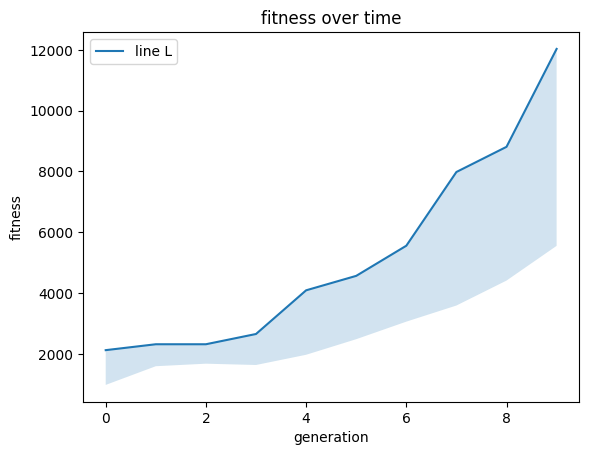

In [ ]:
import matplotlib.pyplot as plt

x  = range(10)
plt.plot(x, max_fitnesses, label="line L")
plt.fill_between(x, min_fitnesses, max_fitnesses, alpha=0.2)
plt.plot()

plt.xlabel("generation")
plt.ylabel("fitness")
plt.title("fitness over time")
plt.legend()
plt.show()

### Generate the directions for the recipe given its ingredients

To obtain more neatly formatted results, we have listed the generated recipe ingredients into previously prepared template, resulting in the delightful emergence of real-life recipes!

In [ ]:
def generate_directions(ingredients_and_qty):
  dry_ingr = []
  wet_ingr = []
  for elem in ingredients_and_qty:
    if elem['unit'] == 'g':
      dry_ingr.append(elem['ingredient'])
    else:
      wet_ingr.append(elem['ingredient'])
  temp = ['180°', '190°', '200°']
  time = ['30', '35', '40']
  time_refrig = ['1', '2', '3']

  template_0 = "Preheat the oven at " + random.choice(temp) + "."
  template_1 = "Mix together {dry_ingredients} in a bowl."
  template_2 = "In another bowl, beat together {wet_ingredients}."
  template_3 = "Now combine and mix all the ingredients together."
  template_3_1 = "Chill the cookie dough in the refrigerator for " + random.choice(time_refrig) + " hour."
  template_4 = "Spread the batter into a cake pan."
  template_4_1 = "Now roll the cookie dough into balls and place them on a baking tray."
  template_5 = "Bake for " + random.choice(time) + " minutes."

  dry_ingredients = ""
  wet_ingredients = ""

  for elem in dry_ingr:
    if dry_ingr.index(elem) == (len(dry_ingr)-1):
      dry_ingredients += "and " + elem
    else:
      dry_ingredients += elem + ", "

  for elem in wet_ingr:
    if wet_ingr.index(elem) == (len(wet_ingr)-1):
      wet_ingredients += "and " + elem
    else:
      wet_ingredients += elem + ", "

  # Create a dictionary of ingredient names and other details
  recipe_details = {
      "dry_ingredients": dry_ingredients,
      "wet_ingredients": wet_ingredients,
      "temperature": temp,
      "time": time,
      "time_refrig": time_refrig
  }


  # Replace placeholders in templates with actual details
  template_0 = template_0.format(**recipe_details)
  template_1 = template_1.format(**recipe_details)
  template_2 = template_2.format(**recipe_details)
  template_3 = template_3.format(**recipe_details)
  template_3_1 = template_3_1.format(**recipe_details)
  template_4_1 = template_4_1.format(**recipe_details)
  template_4 = template_4.format(**recipe_details)
  template_5 = template_5.format(**recipe_details)

  # Generate either a cookie recipe or a cake recipe with probability = cookie_to_cake_ratio
  cookie_to_cake_ration = 0.5

  if random.randint(0, 1) < cookie_to_cake_ration:
    # Combine the modified templates to create a recipe description
    cake_description = f"{template_0}\n{template_1}\n{template_2}\n{template_3}\n{template_4}\n{template_5}"
    return cake_description
  else:
    cookie_description = f"{template_0}\n{template_1}\n{template_2}\n{template_3_1}\n{template_4_1}\n{template_5}"
    return cookie_description

In [ ]:
# Directions for the recipe
print(generate_directions(recipe['ingredients']))

Preheat the oven at 200°.
Mix together banana, flour, white sugar, butter, buttermilk, and confectioners's sugar in a bowl.
In another bowl, beat together lemon juice, baking soda, salt, egg, vanilla extract, cream cheese, vanilla extract, .
Chill the cookie dough in the refrigerator for 3 hour.
Now roll the cookie dough into balls and place them on a baking tray.
Bake for 35 minutes.


### Evaluation conclusions
The final creativity level of our system is highly influenced by the inspirational recipes provided. With current state-of-art, we are getting amazingly variation of either cookies or cake recipes. During multiple runs of the algorithm, we are converging to the highest possible fitness score, which finishing by producing one best recipe. However, each of these is slightly different from others.

### Presenting our Cook Book
To adequately present the remarkable showcase of our Cook Book program, we harnessed the capabilities of advanced Generative AI systems. The presentation process involved utilization of Dream Studio to generate photos on our showcase webpage.

Dream Studio - Dream Studio's model, "SDXL v1.0" emerged as a key factor in shaping the imagery for the subsequent three recipes. By formulating concise yet instructive prompts, we successfully generated three thematically aligned illustrations, artfully conveying the essence of recipes itself. Here is the one example of evaluated prompt:

```
Create a bright and minimalistic photo showcasing the essence of a 'Lemon Bliss Banana Cake.'
The cake is a delightful combination of banana, lemon, and a touch of sweetness.
Emphasize the freshness and simplicity of the ingredients.
Use soft, natural lighting to enhance the overall brightness of the scene.
Consider incorporating elements like fresh bananas, a lemon, or a slice of the cake in a visually appealing composition.
Capture the mood of a sunny day with a clean and inviting aesthetic.
The final photo should evoke a sense of joy and the delicious flavors of the Lemon Bliss Banana Cake.
```

Each of the recipe's title were generated by AI with respect to its context.
Subsequently, all the components were assembled into one webpage showcase, which was created in collaboration of AI generation and our changes.